# 순환 신경망 실습

### 랜덤 시드 설정

In [1]:
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

### 데이터 불러오기

In [5]:
from tensorflow.keras.datasets import imdb
(X_tn0, y_tn0), (X_te0, y_test) = imdb.load_data(num_words=2000)

### 오리지널 데이터 차원 확인

In [6]:
print(X_tn0.shape)
print(y_tn0.shape)
print(X_te0.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


### 트레이닝/밸리데이션 셋 분리

In [7]:
X_train = X_tn0[0:20000]
print(X_train.shape)

y_train = y_tn0[0:20000]
print(y_train.shape)

X_valid = X_tn0[20000:25000]
print(X_valid.shape)

y_valid = y_tn0[20000:25000]
print(y_valid.shape)

(20000,)
(20000,)
(5000,)
(5000,)


### 피처 데이터 형태 확인

In [8]:
print(X_train[0])       # 이미 숫자로 매핑됨

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


### 개별 피처 크기 확인

In [9]:
print(len(X_train[0]))
print(len(X_train[1]))

218
189


### 타깃 클래스 확인

In [10]:
print(set(y_test))
print(len(set(y_test)))

{0, 1}
2


### 피처 데이터 변형

In [11]:
from tensorflow.keras.preprocessing import sequence
X_train = sequence.pad_sequences(X_train, maxlen=100)
print(X_train.shape)
X_valid = sequence.pad_sequences(X_valid, maxlen=100)
print(X_valid.shape)
X_test = sequence.pad_sequences(X_te0, maxlen=100)
print(X_test.shape)

(20000, 100)
(5000, 100)
(25000, 100)


### LSTM 모형 생성

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

model = Sequential()
model.add(Embedding(input_dim=2000, output_dim=100))
model.add(Conv1D(50, kernel_size=3,
                padding='valid',
                activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(LSTM(100, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         200000    
                                                                 
 conv1d (Conv1D)             (None, None, 50)          15050     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 50)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                        

### 모형 컴파일

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
             metrics=['accuracy'])

### 학습

In [14]:
hist = model.fit(X_train, y_train,
                batch_size=100,
                epochs=10,
                validation_data=(X_valid, y_valid))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
200/200 [==============================] - ETA: 0s - loss: 0.4786 - accuracy: 0.7563WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002569AA8F828> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

### 모형 평가

In [15]:
print(model.evaluate(X_train, y_train)[1])
print(model.evaluate(X_valid, y_valid)[1])
print(model.evaluate(X_test, y_test)[1])

625/625 [==============================] - 5s 7ms/step - loss: 0.0073 - accuracy: 0.9983
0.9983000159263611
157/157 [==============================] - 1s 7ms/step - loss: 0.9114 - accuracy: 0.8092
0.8091999888420105
782/782 [==============================] - 5s 7ms/step - loss: 0.8761 - accuracy: 0.8240
0.82396000623703


### 정확도 & 손실 그래프

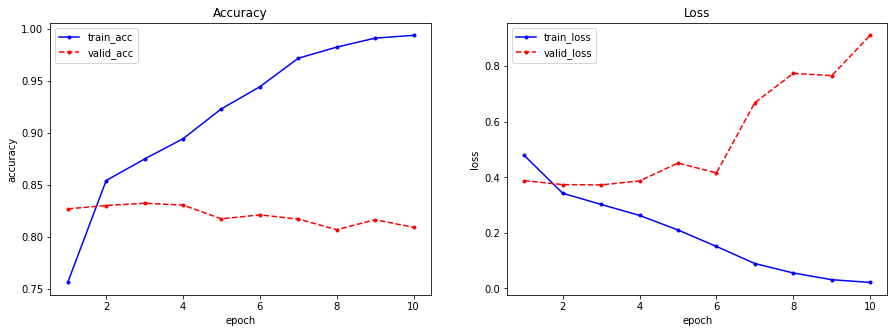

In [17]:
import numpy as np
epoch = np.arange(1, 11)
acc_train = hist.history['accuracy']
acc_valid = hist.history['val_accuracy']
loss_train = hist.history['loss']
loss_valid = hist.history['val_loss']

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(epoch, acc_train, 'b',
        marker='.',
        label='train_acc')
plt.plot(epoch, acc_valid, 'r--',
        marker='.',
        label='valid_acc')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(122)
plt.plot(epoch, loss_train, 'b',
        marker='.',
        label='train_loss')
plt.plot(epoch, loss_valid, 'r--',
        marker='.',
        label='valid_loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()